In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Loading data

In [5]:
df = pd.read_csv("NEE_DATA.csv")

###  Train-validation-test splitting

In [6]:
Y = df['LOGDALMP']
X = df[['NWS7FC_DPT_LATEST','NWS7FC_P12_LATEST', 'NWS7FC_P12_PRIMARY', 'NWS7FC_P24_LATEST','NWS7FC_Q12_LATEST',\
      'NWS7FC_Q24_LATEST', 'NWS7FC_TMP_LATEST','NWS7FC_TMP_ORIG', 'NWS7FC_WND_LATEST',\
      'CLOUD_COVER_PCT','DEWPOINT_NORM', 'DEWPOINT_NORM_05', 'DEWPOINT_NORM_95',\
      'TEMP_NORM','TEMP_NORM_05', 'TEMP_NORM_95', 'WETBULB_NORM', 'WETBULB_NORM_05','WETBULB_NORM_95',\
      'WIND_NORM', 'WIND_NORM_05','WIND_NORM_95']]

In [7]:
df[df['DATETIME'] == '2019-09-01 00:00:00'].index

Int64Index([23350], dtype='int64')

In [8]:
X_train = X.iloc[0:21015].values

In [9]:
X_val = X.iloc[21015:23350].values

In [10]:
X_test = X.iloc[23350:26279].values

In [11]:
# X_train.tail(2)

In [12]:
Y_train = Y.iloc[0:21015].values

In [13]:
Y_val = Y.iloc[21015:23350].values

In [14]:
Y_test = Y.iloc[23350:26279].values

In [15]:
print('train:', X_train.shape, Y_train.shape)
print('validation:', X_val.shape, Y_val.shape)
print('test:', X_test.shape, Y_test.shape)

train: (21015, 22) (21015,)
validation: (2335, 22) (2335,)
test: (2929, 22) (2929,)


### RF Importance plot

In [16]:
max_depth_list = np.arange(1,100,10)
max_depth_list

array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
MAE_train_list=[]
MAE_val_list=[]

for max_depth in max_depth_list:
    RF=RandomForestRegressor(n_estimators=20,  max_depth=max_depth, random_state=0)
    RF.fit(X_train, Y_train)
    Y_train_pred = RF.predict(X_train)
    MAE_train = np.mean(np.abs(Y_train - Y_train_pred))
    MAE_train_list.append(MAE_train)
    
    Y_val_pred = RF.predict(X_val)
    MAE_val = np.mean(np.abs(Y_val - Y_val_pred))
    MAE_val_list.append(MAE_val)

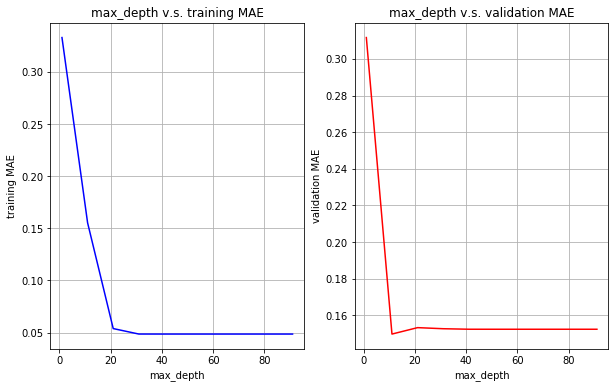

In [19]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].plot(max_depth_list, MAE_train_list, 'b')
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('training MAE')
ax[0].set_title('max_depth v.s. training MAE')
ax[0].grid(True)
ax[1].plot(max_depth_list, MAE_val_list, 'r')
ax[1].set_xlabel('max_depth')
ax[1].set_ylabel('validation MAE')
ax[1].set_title('max_depth v.s. validation MAE')
ax[1].grid(True)

In [20]:
max_depth_best = 16

In [21]:
RF=RandomForestRegressor(n_estimators=20,  max_depth=max_depth_best, random_state=0)
RF.fit(X_train,Y_train)
Y_train_pred = RF.predict(X_train)
Y_test_pred = RF.predict(X_test)

print('Evaluate model on testing set')
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)

Evaluate model on testing set
MSE= 0.13770387831140238
MAE= 0.3017453736882437
MAPE= 0.0968279883422357


In [22]:
xlabel = list(X.columns.values)
importances = RF.feature_importances_
# print(type(xlabel))
# print(importances)

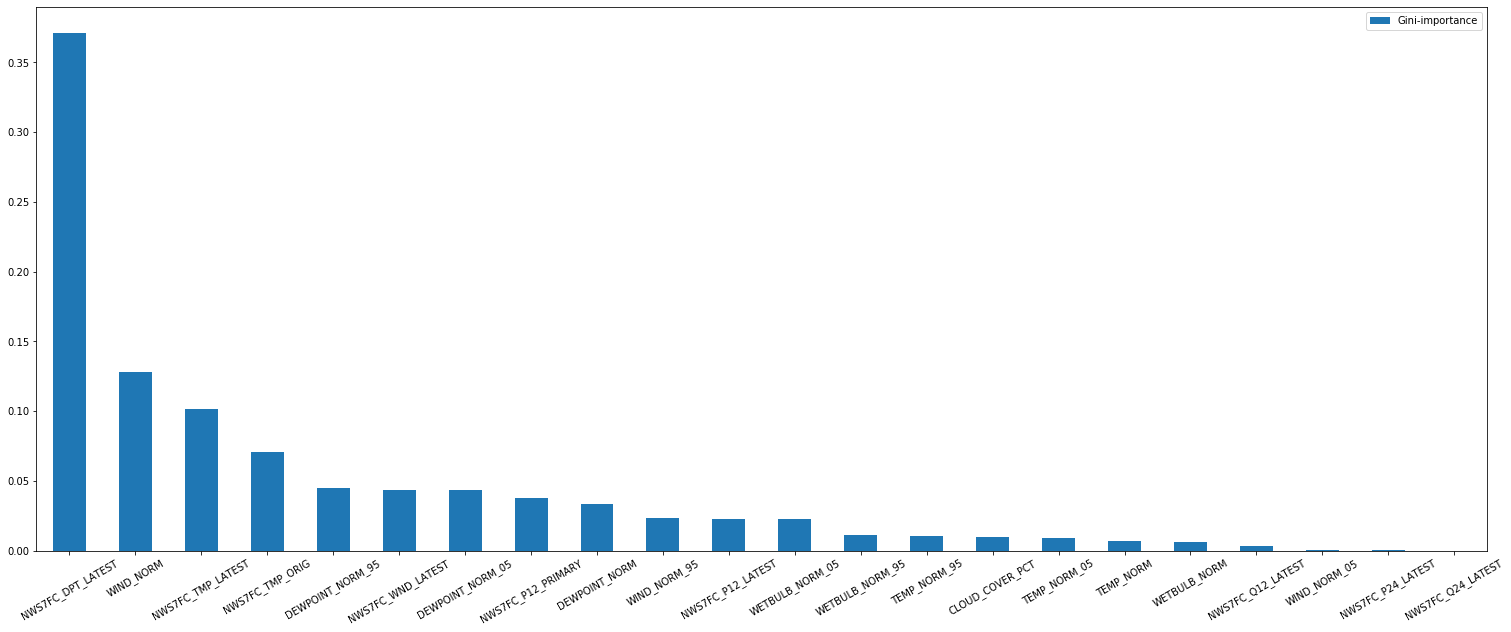

In [23]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, RF.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
fig = importances.sort_values(by='Gini-importance',ascending=False).plot(kind='bar', rot=30,figsize=(26,10));